# COMPOUNDING FREQUENCY AND EAR:

you have 100 USD, COMPUNDED QUARTERLY AT 3%

In [10]:
import numpy as np
import numpy_financial as npf

In [1]:
pv=100
r=0.03
m=4
n=2

In [3]:
fv=pv*(1+r/m)**(n*m)
fv

106.15988478182759

In [4]:
ear= ((1+r/m)**m)-1
ear

0.030339190664062654

In [5]:
ear*100

3.0339190664062654

QUESTION: A-Z RETIREMENT PLAN

retire in 35, will earn 4% in funding phase, 3% in payout phase, deposit how much in 35 years to get 2500 for next 25 years and a 100k fv at end

PAYOUT PHASE:

In [6]:
m=12
r2=0.03
cf2=2500
n2=25
fv2=100000


In [13]:
pv2= npf.pv(rate=r2/m, nper=n2*m, pmt=cf2, fv=fv2,when='begin')
pv2

-575789.9978483317

FUNDING PHASE:

In [14]:
m=12
r1=0.04
n1=35
fv1=-pv2
pv1=0

In [16]:
cf1 = npf.pmt(rate=r1/m, nper=n1*m, pv=pv1, fv=fv1 )
cf1

-630.1526790408823

# SENSITIVITY ANALYSIS:


RELATION BW INTEREST RATE AND INCREASE IN PAYMENTS 
SINCE INTEREST RATE VARIES WE WILL USE A RANGE TO DETERMINE THE POSSIBLE INTEREST RATE OUTCOMES FOR THE PAYOUT PERIOD (FUNDING PERIOD RATE WAS FIXED) AND WE WILL CALCULATE HOW MUCH MONTHLY WE NEED TO PUT AS A RISK MEASURE TO END UP W OUR DESIRED OUTCOME 

In [20]:
m=12
n2=25
cf2=2500
fv2=100000
r2=np.arange(0.005,0.065,0.005)

In [22]:
pv2= npf.pv(rate=r2/m,nper=n2*m,pmt=cf2,fv=fv2,when='begin')
pv2

array([-793426.41897161, -741795.38006778, -694625.90517336,
       -651486.6280425 , -611990.48665175, -575789.99784833,
       -542573.04921771, -512059.15047025, -483996.09318006,
       -458156.9734919 , -434337.5375343 , -412353.81381446])

In [23]:
m=12
n1=35
fv1=-pv2
r1=0.04
pv1=0

In [25]:
cf1= npf.pmt(rate=r1/m,nper=n1*m,fv=fv1,pv=pv1)
cf1

array([-868.33704199, -811.8313062 , -760.20836887, -712.99613671,
       -669.77100358, -630.15267904, -593.79958286, -560.40474253,
       -529.69213759, -501.41344127, -475.34511525, -451.28581854])

In [26]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Interest Rate in Payout Phase')

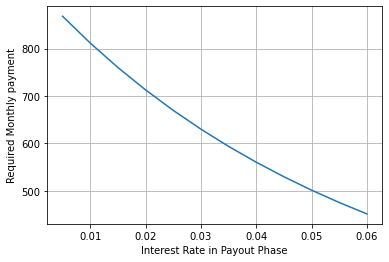

In [27]:
plt.plot(np.arange(0.005,0.065,0.005),np.abs(cf1))
plt.grid()
plt.ylabel('Required Monthly payment')
plt.xlabel('Interest Rate in Payout Phase')